# Space_filling_model_interface_finder

We are concerned with  interfaces and interactions within macro-molecular complexes.
In the sequel, we study two cases:
* Case 1: using sbl-bif-chainsW-atomic.exe to investigate contacts between chains
* Case 2: using sbl-bif-domainsW-atomic.exe to investigate contacts between regions/domains of a protein

## Case 1, example 1:  the ternary antibody-antigen complex -- pdbid 1vfb.pdb

### Run the calculation

In [12]:
#!/usr/bin/python

import re  #regular expressions
import sys #misc system
import os
import pdb
import shutil # python 3 only


def find_file_in_output_directory(str, odir):
    cmd = "find %s -name *%s" % (odir,str)
    return os.popen(cmd).readlines()[0].rstrip()
    
def run_calculation(pdbid):
    #input filename  and output directory
    pdb_prefix = pdbid.rsplit(".")[0]
    ifname = "data/%s" % pdbid
    odir = "results-%s" % pdb_prefix
    if not os.path.exists(odir): os.system( ("mkdir %s" % odir) )

    # check executable exists and is visible
    exe = shutil.which("sbl-bif-chainsW-atomic.exe")
    if not exe:
        print("Executable sbl-bif-chainsW-atomic.exe not found, exiting")
        return
    
    # run command
    cmd = "%s -f %s -p 1 --directory %s --verbose --output-prefix --log" % (exe,ifname,odir)
    os.system(cmd)

    # list output files
    ofnames = os.popen( ("ls %s" % odir) ).readlines()
    print("\nAll output files are:",ofnames)

    # find the lof file and display log file
    lfname = find_file_in_output_directory("log.txt", odir) 
    print("\nLog file is:", lfname)
    #log = open(lfname).readlines()
    # for line in log:         print(line.rstrip())

print("Marker : Calculation Started")
run_calculation("1vfb.pdb")
print("Marker : Calculation Ended")

Marker : Calculation Started

All output files are: ['sbl-bif-chainsW-atomic__radius_water_1dot4__f_1vfb__p_1__biochemical_interfaces_graph.dot\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1vfb__p_1__biochemical_interfaces_graph.xml\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1vfb__p_1__log.txt\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1vfb__p_1_vor_interfaces_graph.dot\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1vfb__p_1_vor_interfaces_graph.xml\n']

Log file is: results-1vfb/sbl-bif-chainsW-atomic__radius_water_1dot4__f_1vfb__p_1__log.txt
Marker : Calculation Ended


### Display the output
The 1vfb file contains three polypeptide chains names A, B, and C. 

Marker : Calculation Started
Interfaces within chains of   PDB file:
S-S bonds and salt bridges within PDB file:
Marker : Calculation Ended


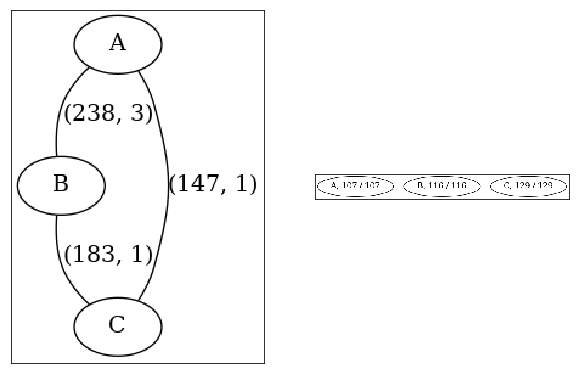

In [8]:
from IPython.display import Image
import matplotlib.pyplot as plt
from PIL import Image

def display_images(img1, img2):
    fig, ax = plt.subplots(1, 2,  figsize=(10,20))
    images = [img1, img2]
    for i in range(0,2):
        ax[i].set_xticks([]); ax[i].set_yticks([])
        ax[i].imshow( Image.open(images[i] ))
    
def display_graphs(pdbid):
    pdb_prefix = pdbid.rsplit(".")[0]
    ifname = "data/%s" % pdbid
    odir = "results-%s" % pdb_prefix

    # find the dot file listing interfaces
    of_interf_dot = find_file_in_output_directory("vor_interfaces_graph.dot", odir)
    of_interf_xml = find_file_in_output_directory("vor_interfaces_graph.xml", odir)           
    

    # plot and display image
    of_geom_png = "%s-geom_interfaces.png" % pdb_prefix
    cmd = "dot -Tpng %s -o %s" % (of_interf_dot,of_geom_png);  os.system(cmd)
   
    print("Interfaces within chains of   PDB file:")
    #img_geom = Image(filename = of_geom_png, width=300, height=300);  display(img_geom)

    # likewise for biochemical interfaces i.e. S-S bonds and salt bridges
    of_biochem_dot = find_file_in_output_directory("biochemical_interfaces_graph.dot", odir)
    of_biochem_xml =  find_file_in_output_directory("biochemical_interfaces_graph.xml", odir)
   

    # plot and display image
    of_biochem_png = "%s-biochem_interfaces.png" % pdb_prefix
    cmd = "dot -Tpng %s -o %s" % (of_biochem_dot, of_biochem_png);     os.system(cmd)
    
    print("S-S bonds and salt bridges within PDB file:")
    #img_biochem = Image(filename = of_biochem_png, width=300, height=300); display(img_biochem)
    
    display_images(of_geom_png, of_biochem_png)                            
                                 
print("Marker : Calculation Started")
display_graphs("1vfb.pdb")
print("Marker : Calculation Ended")


For the graph of interfaces:
* one node for each chain, 
* one edge for each interface between these two chains. Furthermore, each edge indicates the number of atoms involved and the number of connected components (patches) at this interface.

For the graph of S-S bonds and salt bridges: no relevant information here.

## Case1, example 2:  complete immunoglobulin -- pdbid 1igt.pdb
The following example is quite interesting: as a complete immunoglobulin, we investigate the contacts between the four chains, from a geometric standpoint as well as in terms  of S-S bonds and salt bridges

Marker : Calculation Started
Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-bif-chainsW-atomic.exe


All output files are: ['sbl-bif-chainsW-atomic__radius_water_1dot4__f_1igt__p_1__biochemical_interfaces_graph.dot\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1igt__p_1__biochemical_interfaces_graph.xml\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1igt__p_1__log.txt\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1igt__p_1_vor_interfaces_graph.dot\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_1igt__p_1_vor_interfaces_graph.xml\n']

Log file is: results-1igt/sbl-bif-chainsW-atomic__radius_water_1dot4__f_1igt__p_1__log.txt
Interfaces within chains of   PDB file:
S-S bonds and salt bridges within PDB file:
Marker : Calculation Ended


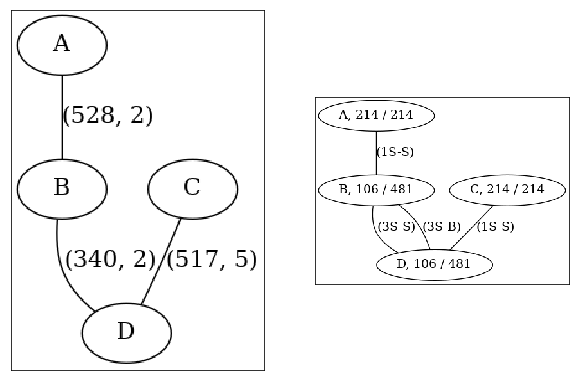

In [9]:
print("Marker : Calculation Started")
run_calculation("1igt.pdb")
display_graphs("1igt.pdb")
print("Marker : Calculation Ended")

The graph of interfaces illustrates the contacts between the heavy and light chains of the IG.

The graph of S-S bonds illustrates disulfide bonds found across the chains. S-S bonds within a chain can also be reported with the option --internal, as illustrated below.

(left) The structure involves four chains. Note in particular the 3 disulfides bonds connecting
the two heavy chains (right) The graph produced, with edges counting disulfide bonds and salt bridges.
Note that there is a total of  17 / 17 S-S bonds and 18 salt bridges.

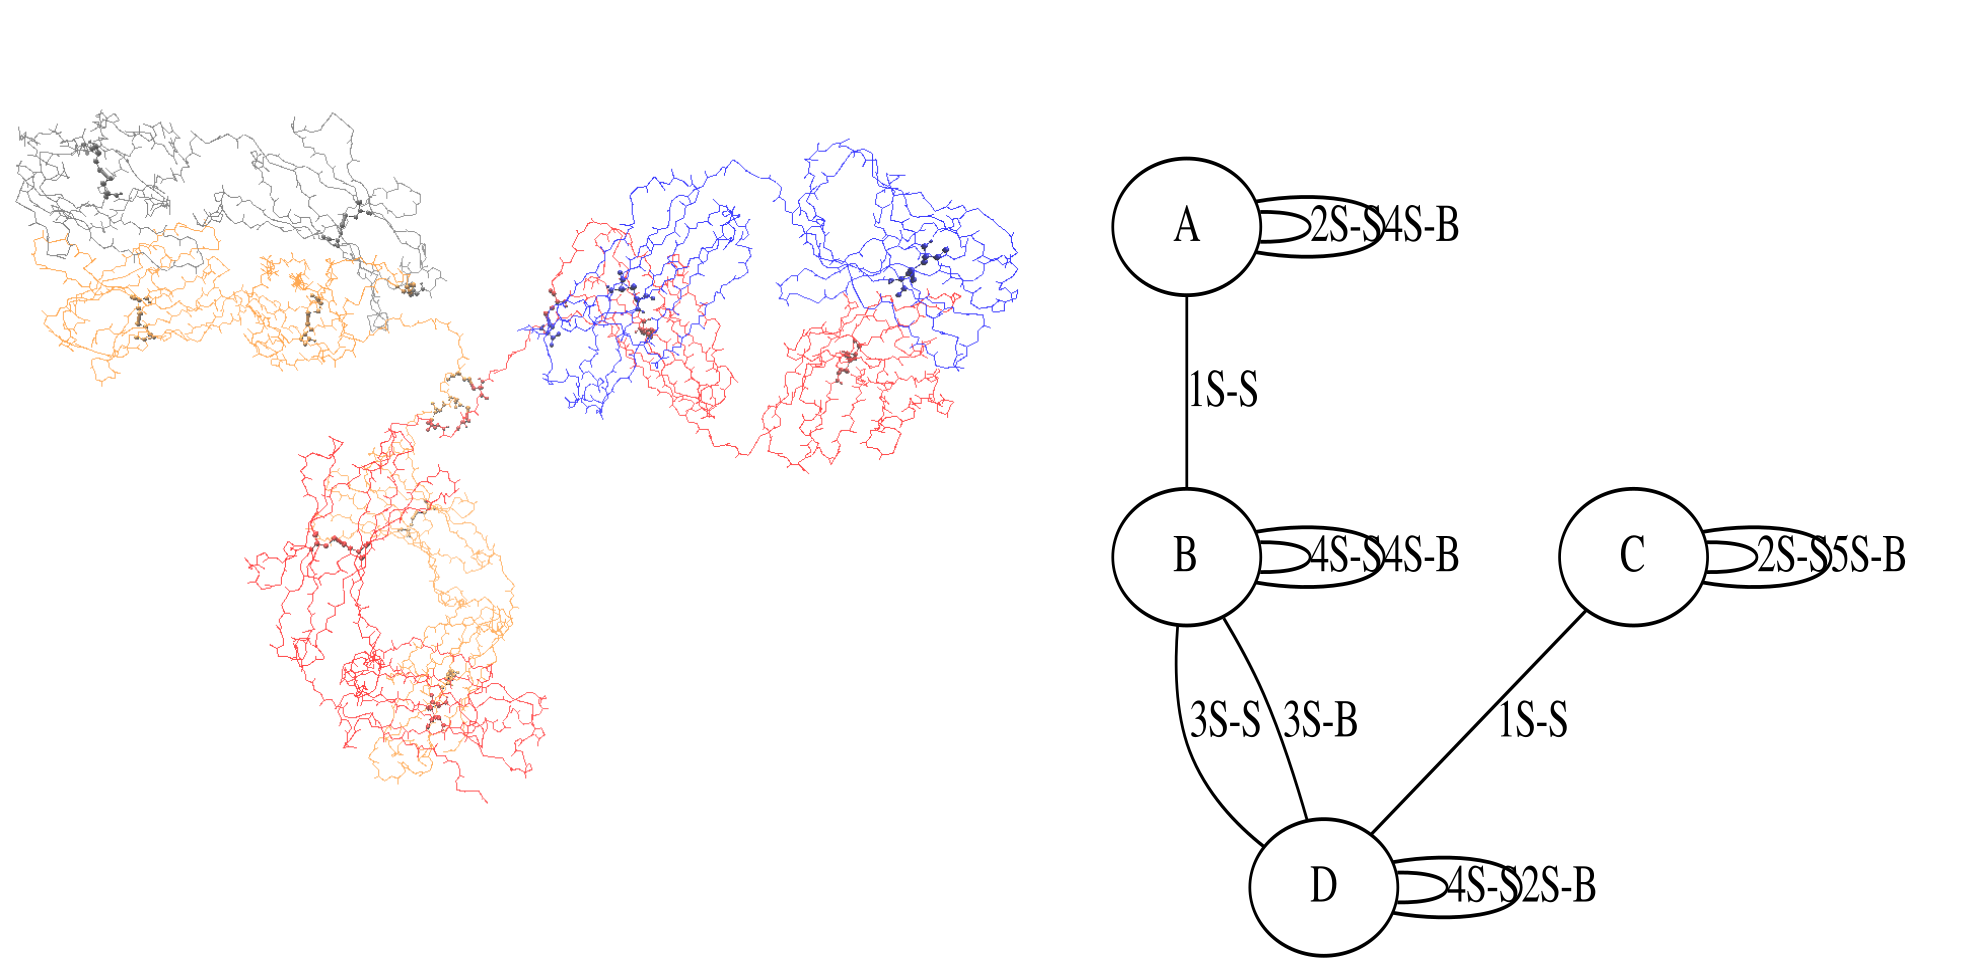

In [70]:
display(Image(filename ="fig/1igt-biochem-annotations--montage.png", width=500, height=500));

## Case 1, example 3: COP9 signalosome -- pdbid 4d10.pdb
This  more complex example involves 16 subunits.

Marker : Calculation Started
Using executable /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-bif-chainsW-atomic.exe


All output files are: ['sbl-bif-chainsW-atomic__radius_water_1dot4__f_4D10__p_1__biochemical_interfaces_graph.dot\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_4D10__p_1__biochemical_interfaces_graph.xml\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_4D10__p_1__log.txt\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_4D10__p_1_vor_interfaces_graph.dot\n', 'sbl-bif-chainsW-atomic__radius_water_1dot4__f_4D10__p_1_vor_interfaces_graph.xml\n']

Log file is: results-4D10/sbl-bif-chainsW-atomic__radius_water_1dot4__f_4D10__p_1__log.txt
Interfaces within chains of   PDB file:
S-S bonds and salt bridges within PDB file:
Marker : Calculation Ended


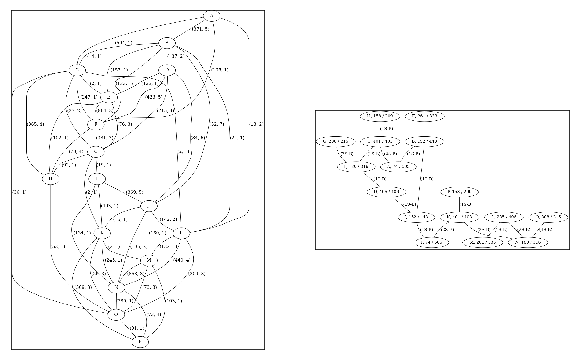

In [13]:
print("Marker : Calculation Started")
run_calculation("4D10.pdb")
display_graphs("4D10.pdb")
print("Marker : Calculation Ended")


As can be seen, there are many more interfaces and biochemical features of interest. A full description of the findinds is reported in the xml files dumped into the results directory. Such files should be parsed with PALSE, see
 https://sbl.inria.fr/doc/PALSE-user-manual.html

## Case 2, example 1: contacts within domains for a  class II fusion protein -- pdbid  4ojc.pdb
Recall that class II fusogens act as trimers. Assume that a decomposition of a monomer into domains has been provided using labels. All contacts between such domains are easily infered.


In [13]:
import os
import shutil 

def run_calculation():
    #input filename  and output directory
    print("Marker : Calculation Started")
    pdbid = "4ojc--EFF1-trimer.pdb"
    pdb_prefix = pdbid.rsplit(".")[0]
    ifname = "data/4ojc--EFF1-trimer.pdb"
    domain_labels = "data/4ojc--EFF1-trimer-partners.txt"
    
    odir = "results-%s" % pdb_prefix
    if not os.path.exists(odir): os.system( ("mkdir %s" % odir) )

    # check executable exists and is visible
    exe = shutil.which("sbl-bif-domainsW-atomic.exe")
    if not exe:
        print("Executable  sbl-bif-domainsW-atomic.exe not found, exiting")
        return

    # run command
    cmd = "%s -f %s --domain-labels  %s --directory %s --verbose --output-prefix --log"\
        % (exe, ifname,domain_labels, odir)
    print("Running ",cmd)
    os.system(cmd)
    print("Marker : Calculation Ended")

run_calculation()

Marker : Calculation Started
Running  /user/fcazals/home/projects/proj-soft/sbl-install/bin/sbl-bif-domainsW-atomic.exe -f data/4ojc--EFF1-trimer.pdb --domain-labels  data/4ojc--EFF1-trimer-partners.txt --directory results-4ojc--EFF1-trimer --verbose --output-prefix --log
Marker : Calculation Ended


Marker : Calculation Started
Interfaces within chains of   PDB file:
S-S bonds and salt bridges within PDB file:
Marker : Calculation Ended


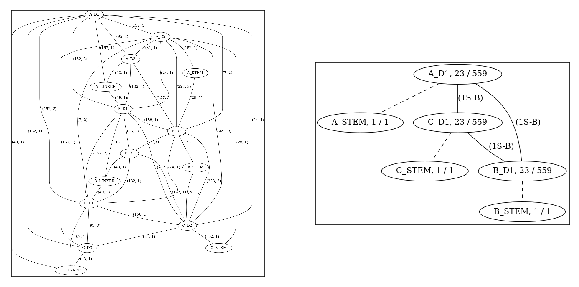

In [14]:
print("Marker : Calculation Started")
display_graphs("4ojc--EFF1-trimer.pdb")
print("Marker : Calculation Ended")

As for the previous example, an automatic processing of the xml files delivered is in order.